# Equações diferenciais

Uma equação diferencial, de forma bastante abstrata, pode ser dada por
$$ \begin{cases}
    f' & = F(t, f) \\
f(t_0) & = f_0.
\end{cases} $$
Uma solução é, então, uma função $g$ tal que $g(t_0) = f_0$ e $g'(t) = F(t, g(t))$, o que explica a notação acima.

Por questões práticas, também é comum dar um _intervalo de solução_, ou seja,
pedir que $g$ seja definida (pelo menos) num intervalo $[a,b]$ onde $t_0 \in [a,b]$.
Aqui, vamos usar $a = t_0$,
pensando "fisicamente" que a equação diferencial modela
a evolução de alguma quantidade $f$ que conhecemos agora ($t_0$)
e que queremos saber o quanto restará num momento futuro ($t_f = b$).

# O método de Euler

Continuando nesta linha, é razoável discretizar o problema da seguinte forma:

1. Definimos uma sequência de pontos $a = t_0 < t_1 < t_2 < \cdots < t_n = t_f = b$ no intervalo $[a,b]$.
2. Como $f$ é derivável, temos a aproximação $f(t_{i+1}) \sim f(t_i) + (t_{i+1} - t_i)f'(t_i)$.
3. A equação diferencial permite calcular $f'(t_i) = F(t_i, f(t_i))$.
4. Isso define (recursivamente) uma sequência de aproximações para $f(t_j)$ pela fórmula
$$ f _ {j+1} = f_j + (t _ {j+1} - t_j) F(t_j, f_j).$$

A sequência mais simples de ser usada é, claro, a de $n+1$ pontos igualmente espaçados no intervalo $[a,b]$.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Implemente o método de Euler

Escreva duas funções:

1. Uma função genérica (e recursiva) que recebe $F$, $t_0$, $f_0$ e uma lista $ts$ dos tempos intermediários (a partir de $t_1$ até $t_n$)
2. Uma função especializada (e iterativa, com `for` e `append`) para o caso de intervalos de mesmo comprimento.

Em ambos os casos, a função deve retornar a lista $f_j$ correspondente às aproximações em $t_1$ até $t_f$.

In [2]:
def euler_ts(F, t0, f0, ts):
    t1 = ts[0]
    f1 = f0 + (t1-t0)*F(t0,f0)
    
    if len(ts) == 1:
        return [f1]
    
    return [f1] + euler_ts(F,t1,f1,ts[1:])

In [3]:
def euler(F,t0,tf,f0,nsteps=100):
    dt = (tf-t0)/nsteps
    fj = []
    
    for k in range(nsteps):
        f1 = f0 + dt*F(t0,f0)
        fj.append(f1)
        t0 += dt
        f0 = f1
    
    return fj

### Observação: Equações diferenciais e Integrais

Calcular a integral $\int_a^b h(t) dt$ é a mesma coisa que resolver a equação diferencial
$$ \begin{cases}
    f' & = h \\
  f(a) & = 0,
\end{cases} $$
pelo Teorema Fundamental do Cálculo.
Portanto, é possível implementar uma função `cauchy` usando a função `euler`.

Isso é verdade para vários métodos de integração: muitas vezes existe um método de Equações Diferenciais cujo caso particular é um método de integração quando a ED é "trivial".

In [4]:
def F1(t,ft):
    return ft

f_100 = euler(F1, 0, 1, 1)
assert( abs(f_100[-1] - 2.704813829421526) < 5e-15 )

É claro que, devido a erros numéricos, os métodos não são perfeitamente equivalentes...

In [5]:
ts = linspace(0,1,101)
f_100_ts = euler_ts(F1, 0, 1, list(ts[1:]))
assert( all(abs(array(f_100) - array(f_100_ts)) < 5e-16) )

O que é melhor é que o método de Euler permite resolver equações diferenciais bastante (arbitrariamente!) complicadas:

In [6]:
def F_dificil(t, ft):
    return t*sin(ft) - t**2*cos(ft)

f_dificil = euler(F_dificil, 0, 2, 1, nsteps=100)
assert( abs(f_dificil[-1] - 3.553673725510754) < 5e-15 )

### 2. Qualidade da aproximação

Agora, faça um gráfico da solução numérica $f_{100}$ e da solução exata no intervalo $[0,1]$.
Faça também um gráfico da diferença entre estas soluções.

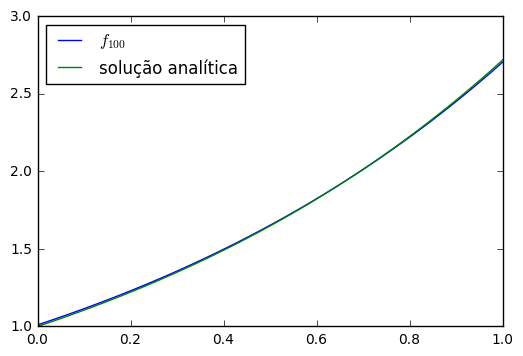

In [7]:
x = linspace(0,1,100)
plot(x,f_100,label='$f_{100}$')
plot(x,exp(x),label='solução analítica')
legend(loc=0);

### 3. Medindo erros

Mesmo que em muitos casos seja bastante razoável usar o "erro final" $g(t_n) - f_n$,
onde $g$ é a solução exata e $f_n$ a aproximação,
vamos nos concentrar no "erro total".
E, para ficar relativamente simples, vamos usar a média dos valores absolutos das diferenças entre $g(t_j)$ e $f_j$.
Usamos a média, e não a soma, porque ao variar o número de passos esta quantidade se mantém homogênea.

In [8]:
def erro(g, fs, ts):
    """ Calcula o erro entre os valores de fs e g(ts). fs e ts devem ser vetores numpy. """
    return sum(abs(g(ts) - fs))/len(ts)

Como o erro total diminui ao aumentar o número de passos efetuados?

Faça um gráfico.

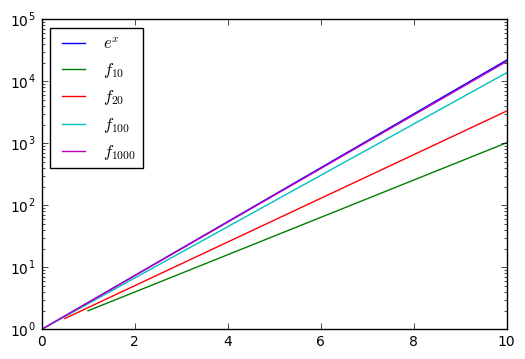

In [9]:
t0,tf,f0 = 0,10,1
def plota_aprox(F,t0,tf,f0,nsteps=100):
    f = euler(F,t0,tf,f0,nsteps)
    x = linspace(t0,tf,nsteps+1)
    if len(x) > len(f):
        x = x[1:]
    plot(x,f,label='$f_{%.0f}$' % nsteps)

s_analitica = ('e^x',exp)

x = linspace(t0,tf,1000)
plot(x,s_analitica[1](x),label='${}$'.format(s_analitica[0]))

for s in [10,20,100,1000]:
    plota_aprox(F1,t0,tf,f0,s)

legend(loc=0);
semilogy();

E comente o resultado.

O método de Euler consiste em "andar" até $t_{n+1}$ pela reta que passa por $t_n$ e cuja inclinação é igual à derivada da função em $t_n$.

Essa ideia geométrica do método mostra que qualquer alteração na derivada (na variação da função) que ocorra entre $t_n$ e $t_{n+1}$ é descartada. O método vai usar os $t_n$s para atualizar a inclinação da reta sobre a qual vai "andar", então se a distância entre $t_n$ e $t_{n+1}$ for grande, o método vai percorrer uma grande distância sem atualizar essa inclinação tornando-o mais sujeito a não levar em consideração mudanças na derivada. Se o "passo" for pequeno, a frequência alta de atualização da inclinação da reta vai provocar um erro menor que no caso de um "passo" grande.

### 4. Sistemas de Equações

O seu método de Euler é capaz de resolver (aproximar) até _sistemas_ de equações diferenciais.
Por exemplo, o sistema
$$ \begin{align}
f_1' & = f_2 \\
f_2' & = -f_1
\end{align} $$
que é equivalente à equação diferencial trigonométrica básica $y'' = -y$,
pode ser simulado assim:

In [10]:
def F2(t, ft):
    return array([ft[1],-ft[0]])

ans = array([-1.0505597866729235, -0.0010851561020816455])
v   = euler(F2, 0, pi, array([1,0]), nsteps=100)

assert( all(abs(v[-1]/ans - 1) < 1e-15) )

Para usar as coordenadas da solução separadamente, ou seja, $f_1$ e $f_2$,
temos que transpor `v`.
(Note que os métodos constróem ao longo do tempo, e não por coordenadas)

In [11]:
v = transpose(v)

### 5. Mais gráficos

Observe que a sua solução numérica realmente está próxima da solução analítica,
fazendo um gráfico para a função e sua derivada.

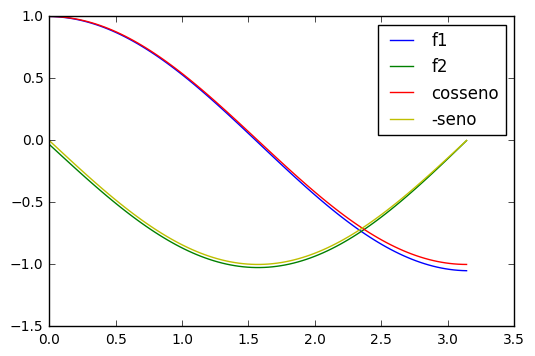

In [27]:
f1,f2 = v[0],v[1]
x = linspace(0,pi,len(f1))
plot(x,f1,label='f1')
plot(x,f2,label='f2')
plot(x,cos(x),label='cosseno')
plot(x,-sin(x),'y',label='-seno')
legend(loc=0)

#f1 é cosseno e f2 -seno

### 6. Erros multidimensionais

Como se comporta o erro no caso do sistema acima, conforme o número de pontos aumenta?
Qual erro é mais importante: o da derivada ($f_2$) ou o da função original ($f_1$)?
Você vê uma razão para isso?

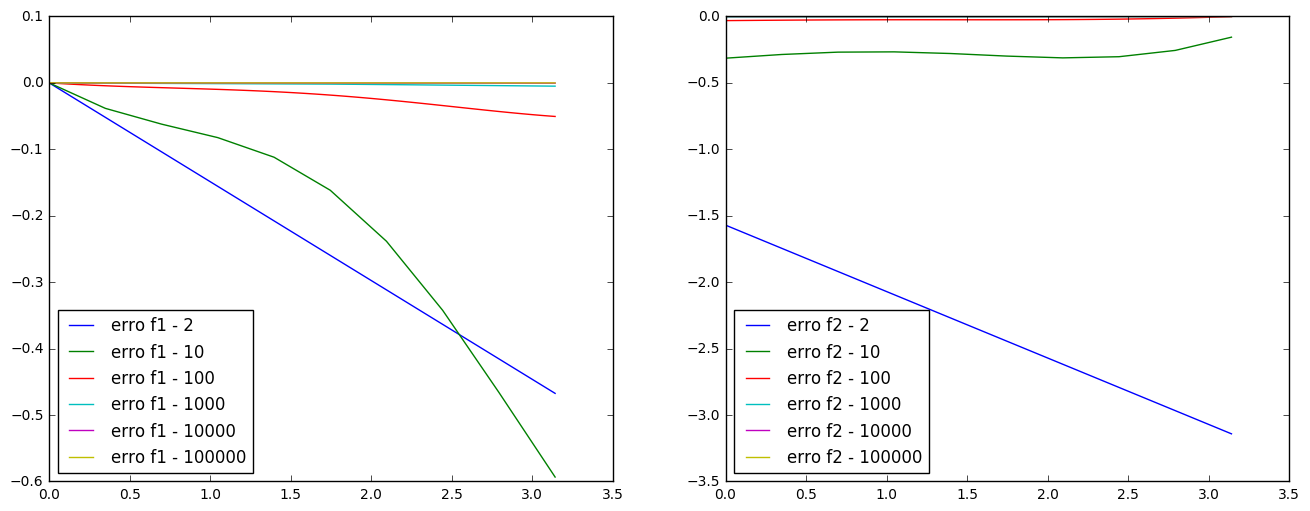

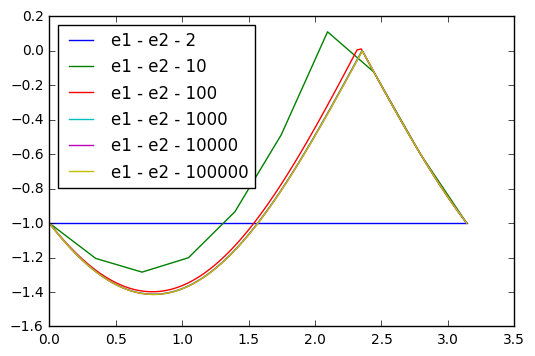

In [64]:
# YOUR CODE HERE
raise NotImplementedError()

O erro certamente depende do intervalo "de integração" da equação diferencial.
Será que a importância relativa também depende? Faça o gráfico do erro para outros intervalos e conclua.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()